# **Project 3**, APS1070 Winter 2021
#### **PCA [15 marks]**
**Deadline: March 20, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Alexander Cheng
*   **Student number**: 1001634298



We will work on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1 to 3**.
* The second Covid-19 dataset reports the total number of recovered patients for each country at the end of each day. We use this dataset in **Part 4 and 5**. 
* Finally, we will apply PCA to images using the MNIST dataset of handwritten digits in **Part 6**.

# Part 1: Getting started [2 Marks]

In [1314]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/cases_feb_21.csv',
    index_col=0,
    thousands=','
)

1. Plot the time-series for the `US`, `China`, ` Canada`, and 3 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. **[0.25]**
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Plot the standardized time-series for the same countries as in `Step 1`. **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down? What do negative and positive values mean? **[1]**

In [1315]:
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1521,1531,1536,1537,1537,1539,1540,1544,1546,1548,1548,1548,1549,1551,1553,1651,1657,1767,1817,1850,1882,1948,1957,1976,1985,2001,2050,2064,2091,2140,2142,2195,2228,2269,2311,2329,2347,2362,2368,2383
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,149769,150505,151142,151569,152031,152555,153093,153590,154063,154557,155006,155414,155884,156393,156996,157593,158168,158559,158962,159443,159956,160426,161087,161559,162029,162601,163213,163975,164736,165535,166200,166800,167604,168444,169487,170527,171154,171717,172315,173635
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2109,2110,2111,2112,2112,2113,2115,2115,2115,2118,2118,2118,2118,2119,2120,2120,2120,2120,2121,2122,2122,2122,2122,2124,2127,2127,2131,2131,2133,2134,2136,2136,2145,2145,2148,2151,2154,2157,2157,2165
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31100,32800,34278,3607

In [1316]:
cases_raw.index.values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

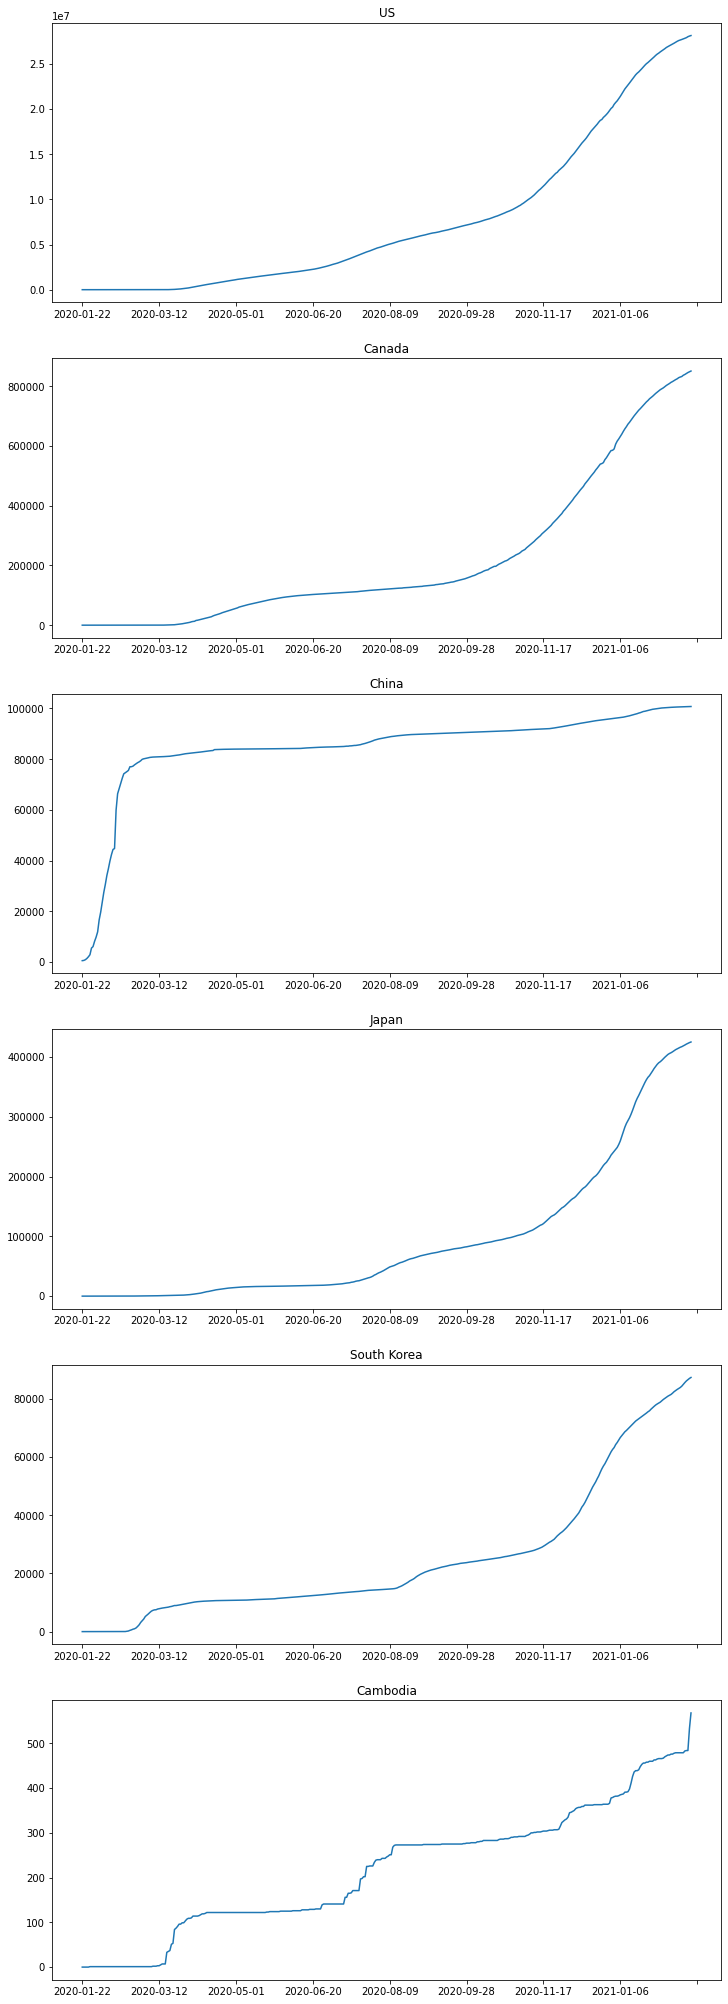

In [1317]:
#Plotting time series on raw-data
figs, axes = plt.subplots(6, 1, figsize = (12, 36))

cases_raw.iloc[list(cases_raw.index).index("US")].plot(ax=axes[0], title = 'US')
cases_raw.iloc[list(cases_raw.index).index("Canada")].plot(ax=axes[1], title = 'Canada')
cases_raw.iloc[list(cases_raw.index).index("China")].plot(ax=axes[2], title = 'China')
cases_raw.iloc[list(cases_raw.index).index("Japan")].plot(ax=axes[3], title = 'Japan')
cases_raw.iloc[list(cases_raw.index).index("Korea, South")].plot(ax=axes[4], title = 'South Korea')
cases_raw.iloc[list(cases_raw.index).index("Cambodia")].plot(ax=axes[5], title = 'Cambodia')

In [1318]:
#Standardizing the data
cases_std = StandardScaler().fit_transform(cases_raw.values)
fit = StandardScaler().fit(cases_raw.values)
cases_std_df = pd.DataFrame(cases_std, index = cases_raw.index, columns=cases_raw.columns )

In [1319]:
cases_std_df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
Afghanistan,-0.073549,-0.073713,-0.074015,-0.073753,-0.073863,-0.073621,-0.073268,-0.073313,-0.073197,-0.073285,-0.073256,-0.073044,-0.072988,-0.072943,-0.072895,-0.072871,-0.072967,-0.072982,-0.072962,-0.073070,-0.073054,-0.073121,-0.072949,-0.072961,-0.073036,-0.073101,-0.073195,-0.073278,-0.073362,-0.073454,-0.073598,-0.073866,-0.074203,-0.074341,-0.074644,-0.075153,-0.075984,-0.076927,-0.078212,-0.079775,...,-0.217284,-0.217289,-0.217341,-0.217346,-0.217332,-0.217494,-0.217590,-0.217794,-0.217872,-0.217992,-0.218029,-0.218119,-0.218205,-0.218346,-0.218517,-0.218664,-0.218780,-0.218879,-0.218955,-0.219018,-0.219160,-0.219396,-0.219507,-0.219703,-0.219823,-0.219966,-0.220063,-0.220231,-0.220439,-0.220615,-0.220796,-0.220944,-0.221096,-0.221275,-0.221506,-0.221769,-0.222061,-0.222174,-0.222350,-0.222536
Albania,-0.073549,-0.073713,-0.074015,-0.073753,-0.073863,-0.073621,-0.073268,-0.073313,-0.073197,-0.073285,-0.073256,-0.073044,-0.072988,-0.072943,-0.072895,-0.072871,-0.072967,-0.072982,-0.072962,-0.073070,-0.073054,-0.073121,-0.072949,-0.072961,-0.073036,-0.073101,-0.073195,-0.073278,-0.073362,-0.073454,-0.073598,-0.073866,-0.074203,-0.074521,-0.074823,-0.075331,-0.076161,-0.077103,-0.078387,-0.079948,...,-0.211313,-0.211134,-0.210947,-0.210765,-0.210581,-0.210672,-0.210565,-0.210560,-0.210421,-0.210278,-0.210025,-0.209775,-0.209688,-0.209500,-0.209362,-0.209171,-0.208953,-0.208721,-0.208444,-0.208178,-0.207968,-0.207824,-0.207540,-0.207323,-0.207010,-0.206704,-0.206429,-0.206113,-0.205878,-0.205634,-0.205418,-0.205128,-0.204853,-0.204740,-0.204670,-0.204528,-0.204398,-0.204125,-0.203861,-0.203592
Algeria,-0.073549,-0.073713,-0.074015,-0.073753,-0.073863,-0.073621,-0.073268,-0.073313,-0.073197,-0.073285,-0.073256,-0.073044,-0.072988,-0.072943,-0.072895,-0.072871,-0.072967,-0.072982,-0.072962,-0.073070,-0.073054,-0.073121,-0.072949,-0.072961,-0.073036,-0.073101,-0.073195,-0.073278,-0.073362,-0.073454,-0.073598,-0.073866,-0.074203,-0.074521,-0.074644,-0.075153,-0.075984,-0.076927,-0.078212,-0.079775,...,-0.192245,-0.192429,-0.192600,-0.192725,-0.192777,-0.192976,-0.193148,-0.193456,-0.193643,-0.193836,-0.193940,-0.194049,-0.194174,-0.194366,-0.194596,-0.194787,-0.194938,-0.195080,-0.195153,-0.195230,-0.195380,-0.195620,-0.195741,-0.195953,-0.196179,-0.196204,-0.196279,-0.196437,-0.196639,-0.196794,-0.196959,-0.197103,-0.197231,-0.197389,-0.197606,-0.197868,-0.198159,-0.198288,-0.198460,-0.198640
Andorra,-0.073549,-0.073713,-0.074015,-0.073753,-0.073863,-0.073621,-0.073268,-0.073313,-0.073197,-0.073285,-0.073256,-0.073044,-0.072988,-0.072943,-0.072895,-0.072871,-0.072967,-0.072982,-0.072962,-0.073070,-0.073054,-0.073121,-0.072949,-0.072961,-0.073036,-0.073101,-0.073195,-0.073278,-0.073362,-0.073454,-0.073598,-0.073866,-0.074203,-0.074521,-0.074823,-0.075331,-0.076161,-0.077103,-0.078387,-0.079948,...,-0.240031,-0.239911,-0.239752,-0.239601,-0.239450,-0.239536,-0.239474,-0.239542,-0.239495,-0.239490,-0.239392,-0.239378,-0.239370,-0.239414,-0.239481,-0.239490,-0.239481,-0.239485,-0.239467,-0.239440,-0.239505,-0.239651,-0.239670,-0.239772,-0.239840,-0.239896,-0.

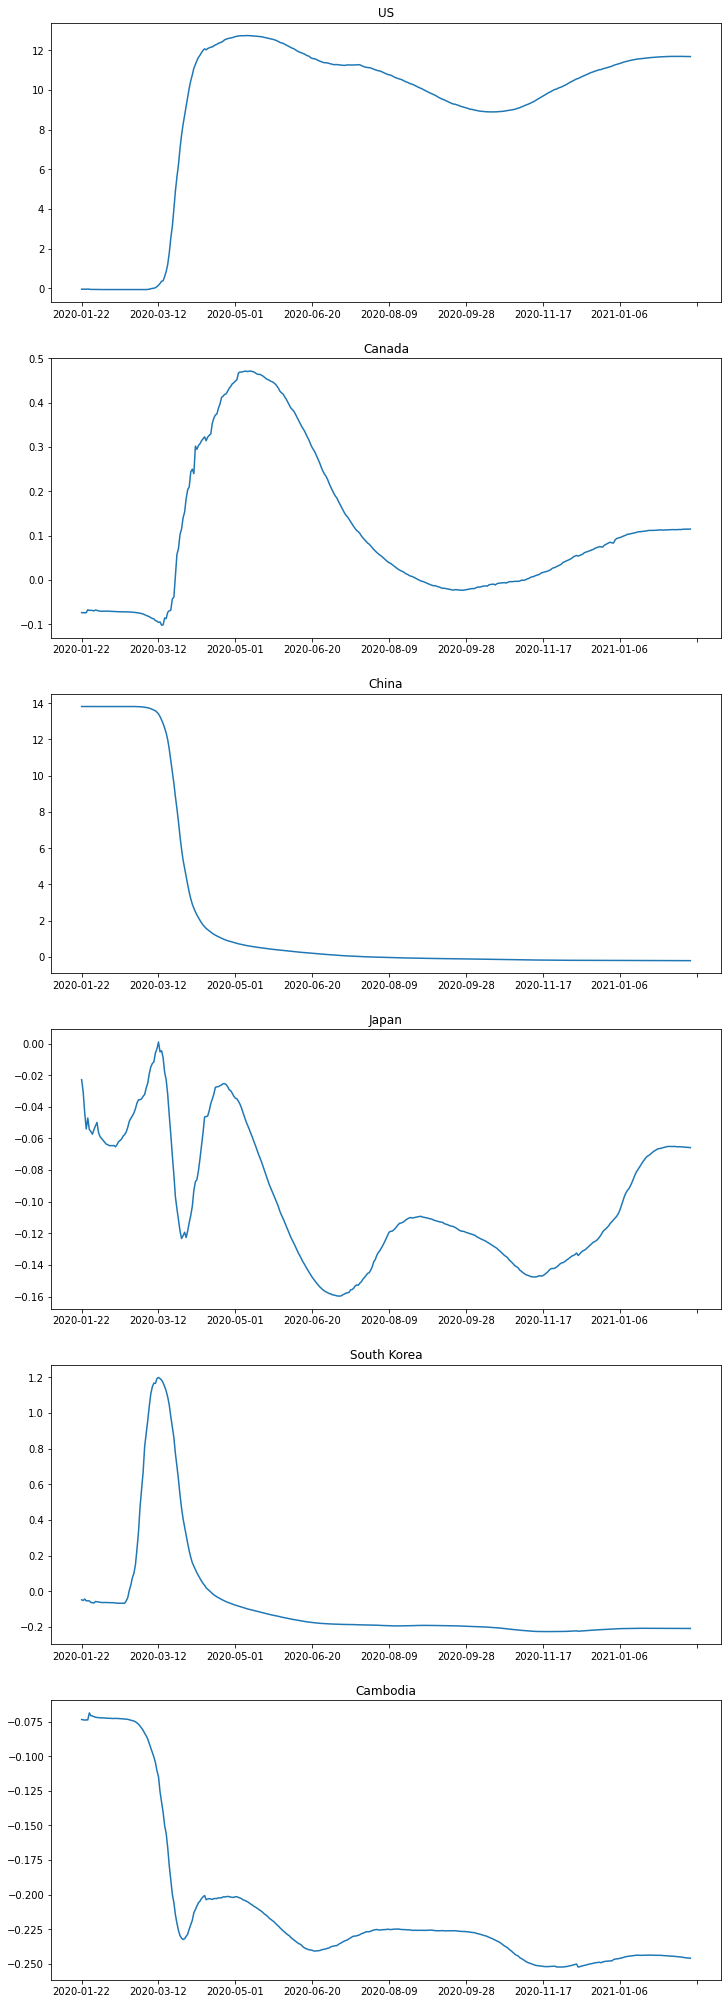

In [1320]:
#Plotting time series on standardized data

figs, axes = plt.subplots(6, 1, figsize = (12, 36))

cases_std_df.iloc[list(cases_std_df.index).index("US")].plot(ax=axes[0], title = 'US')
cases_std_df.iloc[list(cases_std_df.index).index("Canada")].plot(ax=axes[1], title = 'Canada')
cases_std_df.iloc[list(cases_std_df.index).index("China")].plot(ax=axes[2], title = 'China')
cases_std_df.iloc[list(cases_std_df.index).index("Japan")].plot(ax=axes[3], title = 'Japan')
cases_std_df.iloc[list(cases_std_df.index).index("Korea, South")].plot(ax=axes[4], title = 'South Korea')
cases_std_df.iloc[list(cases_std_df.index).index("Cambodia")].plot(ax=axes[5], title = 'Cambodia')

Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down? What do negative and positive values mean? **[1]**

By standardizing the data, the mean of each day is zero. If the curve goes up, that means the number of cases per day increased for that country compared to the previous day for that country. If the curve goes down, the number of cases that day for that country has decreased compared to the previous day for that country.

Positive values means the number of covid cases for that country are above the mean number of cases for all countries. Negative values means the number of covid cases for that country are below the mean number of cases for all countries. 

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (397, 397).* **[0.25]**
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(zoom-in on the x-axis if needed). **[0.25]**
4. How many PCs do you need to cover 99\% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [1321]:
#Covariance Shape, 192 countries, 397 dates
n, m = cases_std.shape
print(n, m)

192 397


In [1322]:
#Covariance Matrix
C = np.dot(cases_std.T, cases_std) / (n-1) 
print(C.shape)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eigh(C) 
print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)

(397, 397)
Eig Vec:
  [[ 0.          0.          0.         ...  0.03872479 -0.12352326
   0.00156869]
 [-0.00829289  0.02806192 -0.00053582 ...  0.03874436 -0.12352184
   0.00155366]
 [-0.00840109 -0.03390644  0.00860777 ...  0.03864527 -0.12353354
   0.001592  ]
 ...
 [ 0.02126802  0.00162976  0.00163604 ... -0.00846866  0.00467074
   0.05711262]
 [ 0.00191984  0.00140499 -0.00910897 ... -0.00844844  0.00467459
   0.05711421]
 [-0.00603628 -0.00811897 -0.00041776 ... -0.00846256  0.00467417
   0.05711479]]  
 Eig Val: 
 [-5.81471596e-14 -5.46147663e-14 -4.47723309e-14 -4.26591102e-14
 -3.82547126e-14 -2.98960830e-14 -2.92830702e-14 -2.29121620e-14
 -1.98675780e-14 -1.92312426e-14 -1.72617288e-14 -1.25681085e-14
 -1.06837601e-14 -9.16746956e-15 -8.07400743e-15 -7.69381310e-15
 -7.62713480e-15 -7.49963323e-15 -7.32599940e-15 -7.15921343e-15
 -6.85115412e-15 -6.68803385e-15 -6.57627035e-15 -6.39844037e-15
 -6.34711174e-15 -6.26841509e-15 -6.22964912e-15 -6.16020432e-15
 -6.02179244e-15 

In [1323]:
#Descending order
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

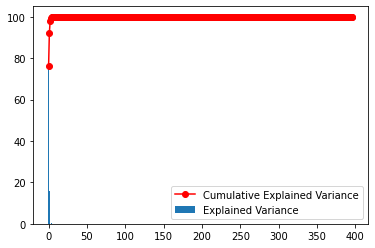

In [1324]:
#Scree Plot
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

plt.bar(range(m), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

In [1325]:
cumExpVar[0:10]

array([76.38614073, 92.13373744, 97.83808684, 99.21488002, 99.75337742,
       99.86382068, 99.92711141, 99.95883905, 99.97226318, 99.98097692])

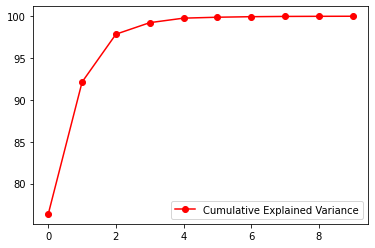

In [1326]:
plt.plot(cumExpVar[0:10], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

Requires at least 4 Principal Components to cover 99% of dataset's variance

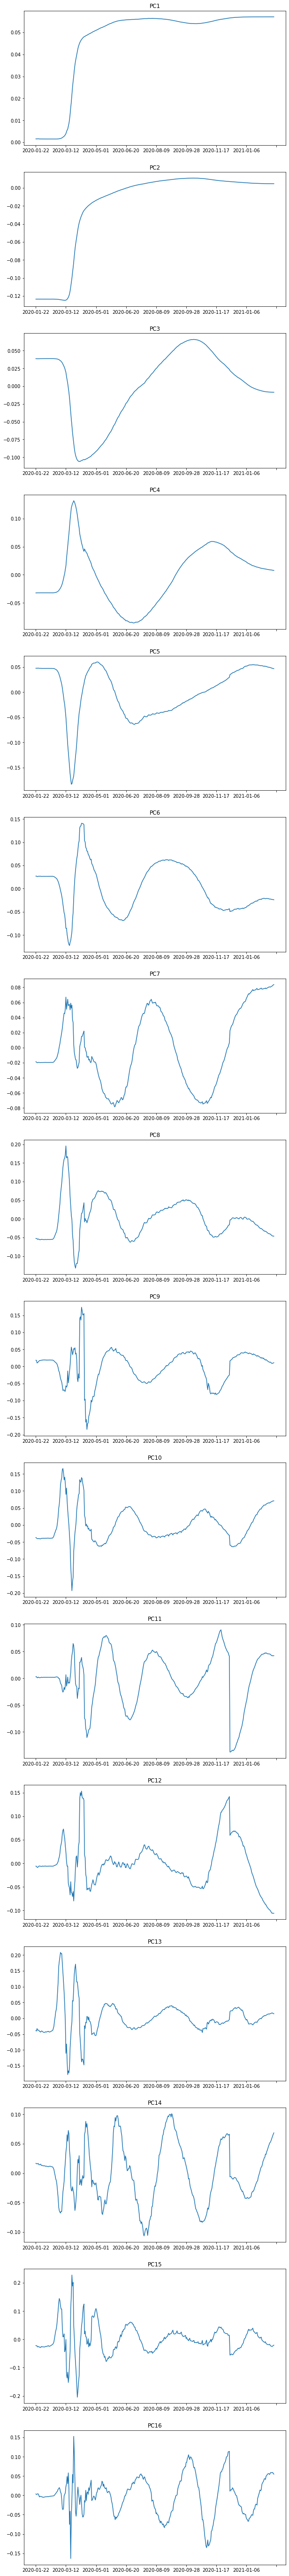

In [1327]:
#Plotting the first 16 PCs as time series

PC_plot = pd.DataFrame(eigenVectors[:, :16].T, columns=cases_raw.columns)

figs, axes = plt.subplots(16, 1, figsize = (10, 100))

PC_plot.iloc[0].plot(ax=axes[0], title = 'PC1')
PC_plot.iloc[1].plot(ax=axes[1], title = 'PC2')
PC_plot.iloc[2].plot(ax=axes[2], title = 'PC3')
PC_plot.iloc[3].plot(ax=axes[3], title = 'PC4')
PC_plot.iloc[4].plot(ax=axes[4], title = 'PC5')
PC_plot.iloc[5].plot(ax=axes[5], title = 'PC6')
PC_plot.iloc[6].plot(ax=axes[6], title = 'PC7')
PC_plot.iloc[7].plot(ax=axes[7], title = 'PC8')
PC_plot.iloc[8].plot(ax=axes[8], title = 'PC9')
PC_plot.iloc[9].plot(ax=axes[9], title = 'PC10')
PC_plot.iloc[10].plot(ax=axes[10], title = 'PC11')
PC_plot.iloc[11].plot(ax=axes[11], title = 'PC12')
PC_plot.iloc[12].plot(ax=axes[12], title = 'PC13')
PC_plot.iloc[13].plot(ax=axes[13], title = 'PC14')
PC_plot.iloc[14].plot(ax=axes[14], title = 'PC15')
PC_plot.iloc[15].plot(ax=axes[15], title = 'PC16')

The first few PC's are smooth with distinct and clear curves moving up and down. It looks much less noisy compared to the higher PCs. The higher PCs seems to be more random.

# Part 3: Data reconstruction [4 Marks]

Create a function that:

*   Accepts a country name as an input (add other arguments if needed).
*   Plots 4 figures:
1.   The original and standardized time-series for the specified country. **[0.5]**
2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
  * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
      * Reconstruction with only PC1
      * Reconstruction with both PC1 and PC2
      * Reconstruction with PC1 to PC4 (First 4 PCs)
      * Reconstruction with PC1 to PC8 (First 8 PCs)
      * Reconstruction with PC1 to PC16 (First 16 PCs)

  * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
3.   The residual error for each of the 5 incremental reconstructions with respect to the original time-series. **[0.5]**
  * Hint: You are plotting how much error do we have for reconstructing each day. On the x-axis, you have dates, and on the y-axis, the residual error. 
4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [1328]:
from math import sqrt

In [1329]:
### Function provides 6 figures for the country entered

def countrycases(country_name):
  print("Country: ", country_name)
  country = country_name
  figs, axes = plt.subplots(3, 2, figsize = (20,20))

  #Plots the original and standardized time-series for the specified country
  cases_raw.iloc[list(cases_raw.index).index(country)].plot(ax=axes[0,0], title = 'Raw Time Series')
  cases_std_df.iloc[list(cases_std_df.index).index(country)].plot(ax=axes[0,1], title = 'Standardized Time Series')

  #Incremental reconstruction of standardized time series
  Reconstruction = []
  InvReconstruction = []
  CumResiduals = []
  RSME = []

  PC_counter = [1, 2, 4, 8, 16]
  count = 0
  for i in range(0, 50):
    W = eigenVectors[:, 0:i] #Using number of PCs
    projX = np.dot(cases_std, W) #Projection
    ReconX = np.dot(projX, W.T) #Reconstruct data
    Reconstruction.append(ReconX[list(cases_raw.index).index(country)]) #Add all the cumulative eigenvectors to a list
    Reconstruction_df = pd.DataFrame(Reconstruction[i].reshape(1,m), columns=cases_raw.columns) 
    
    #Incremental reconstruction of original time series
    InvReconX = fit.inverse_transform(ReconX)
    InvReconstruction.append(InvReconX[list(cases_raw.index).index(country)]) #Add all the cumulative eigenvectors to a list
    InvReconstruction_df = pd.DataFrame(InvReconstruction[i].reshape(1,m), columns=cases_raw.columns) 

    #Calculating Residual Error with respect to original time series
    residual = cases_raw.values[list(cases_raw.index).index(country)] - InvReconstruction[i]
    CumResiduals.append(residual)
    CumResiduals_df = pd.DataFrame(CumResiduals[i].reshape(1,m), columns=cases_raw.columns)

    #Calculating RSME of reconstruction (RSME vs Number of PCs)
    RSME.append(np.sqrt(np.sum(CumResiduals[i]**2)/m))

    #Plotting Specific Graphs
    if count != len(PC_counter): #Can change the list numbers inside PC_counter to see which PCs affect in what way
      if i in PC_counter:
        Reconstruction_df.iloc[0].plot(ax = axes[1,1], title = 'Incremenental Standardized PC Time Series', label = i, legend = True) #Plotting reconstruction on Standardized Data
        InvReconstruction_df.iloc[0].plot(ax = axes[1,0], title = 'Incremenental Original PC Time Series', label = i, legend = True) #Plotting reconstruction on original Data
        CumResiduals_df.iloc[0].plot(ax = axes[2,0], title = 'Raw Residual Error PC Time Series', label = i, legend = True) #Plotting residual error on original Data
        count = count + 1
  
  #Plot for all i components(50)
  PC_Count = np.arange(1, 51, 1)
  plt.plot(PC_Count, RSME)
  plt.title("RSME vs Number of PCs")
  plt.xlabel("Number of PCs")
  plt.ylabel("RSME")

Country:  US


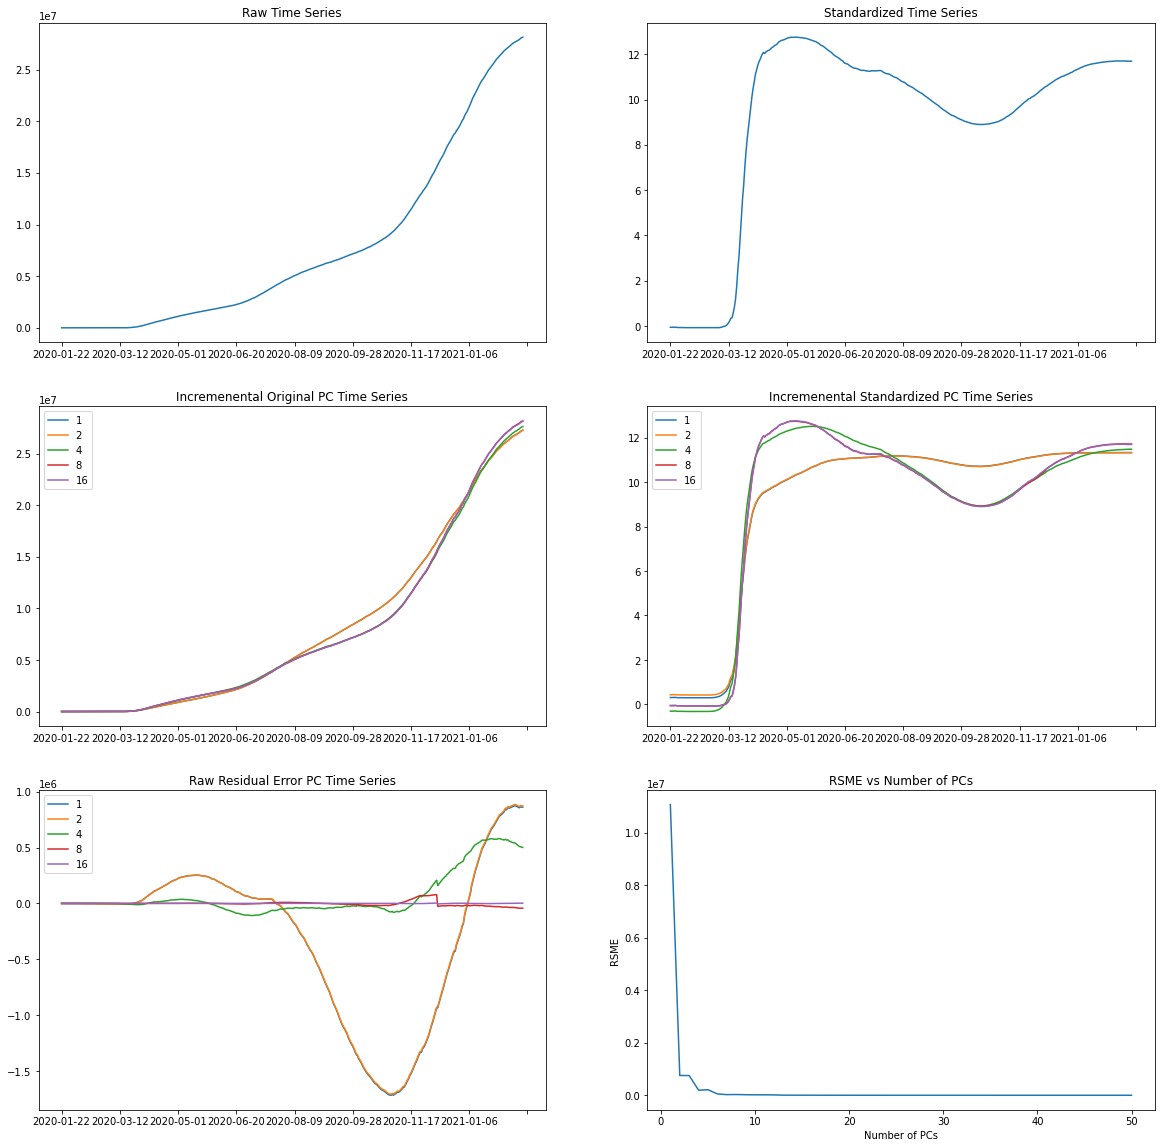

In [1330]:
countrycases("US")

Country:  Canada


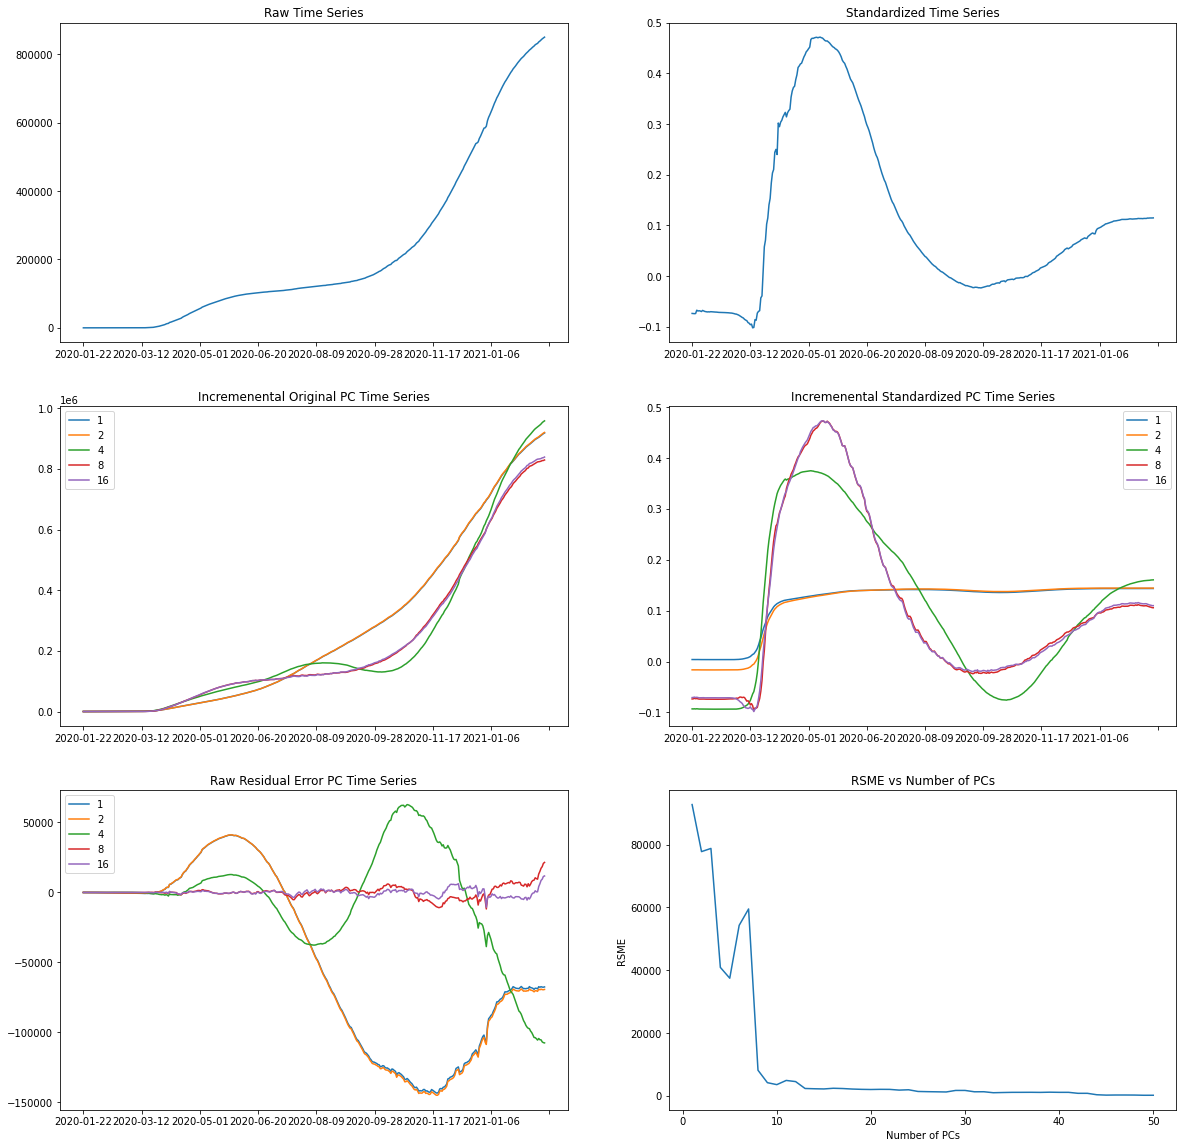

In [1331]:
countrycases("Canada")

Country:  China


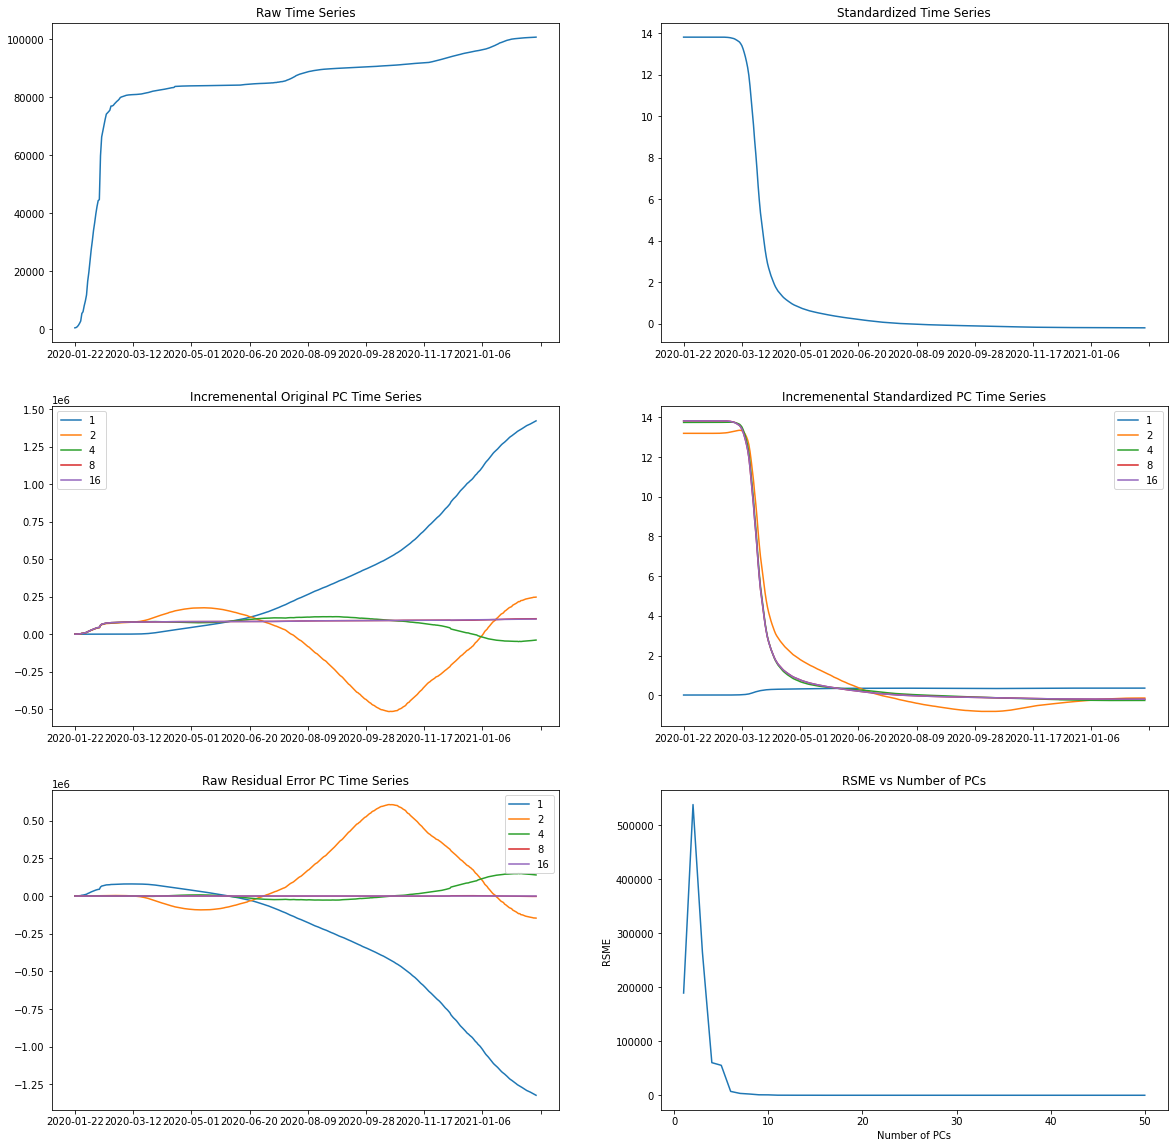

In [1332]:
countrycases("China")

# Part 4: Time-series analysis on recovered cases [2 Marks]

Call the function that you designed in *Part 3* with this new dataset. To do that, you'll first need to preprocess the data (follow the steps we have in Parts 1 and 2 ----don't need to plot anything) and prepare the data for calling the Part 3 function **[1]**. Test your function with the new dataset, with the `US`, `Canada`, and `China`. **[1]**


In [1333]:
import pandas as pd
recovered_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/recoverd_feb_21.csv',
    index_col=0,
    thousands=','
)

In [1334]:
### YOUR CODE HERE ###
recovered_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,44850,45298,45434,45465,45868,46359,46554,46759,46887,46912,46943,47298,47365,47459,47549,47583,47606,47609,47679,47723,47798,47982,47995,48018,48027,48041,48042,48109,48133,48279,48390,48392,48395,48433,48514,48626,48798,48803,48820,48834
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38860,39246,39625,40090,40453,40870,41464,41969,42426,42895,43384,43890,44291,44880,45383,45906,46420,46927,47424,47922,48377,48958,49543,50219,50875,51444,52128,52933,53616,54362,55243,55983,56764,57736,58794,59684,60675,61605,62533,63329
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,69791,69992,70188,70373,70554,70747,70933,71127,71343,71552,71755,71945,72143,72336,72538,72745,72956,73152,73344,73530,73732,73940,74136,74330,74330,74692,74871,75057,75243,75436,75628,75816,75999,76168,76330,76489,76640,76797,76940,77076
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8070,8091,8116,8116,8154,8154,8349,8399,8474,8537,8588,8652,8724,8774,8851,8942,8986,9045,9093,9206,9252,9313,9395,9444,9492,9533,9610,9674,9732,9781,9833,9868,9911,9965,10022,10066,10101,10146,10170,10206
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15631,16008,16120,16225,16347,16677,16822,16921,17176,17223,17249,17266,17327,17388,17602,17692,17918,18015,18035,18180,18232,18335,18381,18431,18475,18540,18596,18623,18687,18710,18786,18790,18795,18884,18929,18951,18972,18991,19005,19013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,16,16,16,16,...,1369,1369,1380,1380,1380,1402,1402,1406,1411,1411,1411,1411,1425,1430,1430,1430,1448,1456,1457,1460,1460,1461,1465,1465,1468,1472,1472,1472,1480,1528,1529,1529,1532,1541,1573,1574,1605,1627,1627,1702
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,134977,136247,137648,138495,139131,140075,140914,142004,142819,143611,144297,144910,145639,146279,146934,147620,148140,148583,148993,149621,150123,150663,151082,151690,152120,152579,153019,153682,154260,154727,155362,155950,156472,157205,157982,158709,159369,160172,160763,161410
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1419,1419,1419,1419,1419,1421,1422,1423,1423,1423,1423,1423,1424,1424,1425,1425,1425,1426,1426,1426,1427,1427,1427,1427,1428,1428,1428,1428,1428,1428,1430,1430,1430,1430,1431,1431,1432,1432,1432,1432
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21568,22504,24105,25106,26159,27327,28066,29775,31522,32667,34293,35960,38639,40362,41282,42

In [1335]:
from sklearn.impute import MissingIndicator

#Preprocessing the missing data with ffill method (Using the previous date as the value)
Trans = [] #Transverse table and look through each row
for i in range(recovered_raw.index.shape[0]):
  Trans.append(np.array(recovered_raw.loc[recovered_raw.index[i]].replace(0,method='ffill')).reshape(1, -1))
Original = np.array(Trans).reshape(n,m)
cases_raw = pd.DataFrame(Original, index = recovered_raw.index, columns=recovered_raw.columns)

#Transforming the data
cases_std = StandardScaler().fit_transform(cases_raw.values)
fit = StandardScaler().fit(cases_raw.values)
cases_std_df = pd.DataFrame(cases_std, index = cases_raw.index, columns=cases_raw.columns )

#Covariance Shape
n, m = cases_std.shape
print(n, m)

#Covariance Matrix
C = np.dot(cases_std.T, cases_std) / (n-1) 

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eigh(C) 
print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)

#Descending order
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

192 397
Eig Vec:
  [[ 0.          0.          0.         ...  0.06006014  0.09975532
  -0.00323208]
 [-0.26951472 -0.11721381 -0.14300079 ...  0.06007197  0.09978291
  -0.00323859]
 [ 0.48075832 -0.06877168  0.22457404 ...  0.06002469  0.09967662
  -0.00321549]
 ...
 [ 0.02210147 -0.00184298  0.01573378 ...  0.01717346 -0.01147642
  -0.06008126]
 [-0.07098773  0.03868049 -0.04433207 ...  0.0171656  -0.0114864
  -0.0600798 ]
 [ 0.02683408 -0.01588698  0.00414693 ...  0.01713455 -0.01148414
  -0.060075  ]]  
 Eig Val: 
 [-7.42476080e-14 -6.10815115e-14 -5.76882473e-14 -5.12790563e-14
 -5.00614812e-14 -4.71883265e-14 -4.60330189e-14 -4.27771663e-14
 -3.78890022e-14 -3.58931298e-14 -3.05911139e-14 -2.98475429e-14
 -2.62107577e-14 -2.55340626e-14 -2.30821496e-14 -1.74064766e-14
 -1.72565220e-14 -1.61883382e-14 -1.37309245e-14 -1.28834444e-14
 -1.24655432e-14 -1.20936779e-14 -1.15081602e-14 -1.14401364e-14
 -1.10676858e-14 -1.05611325e-14 -1.01345969e-14 -9.96383623e-15
 -9.64825111e-15 -9.4

Country:  US


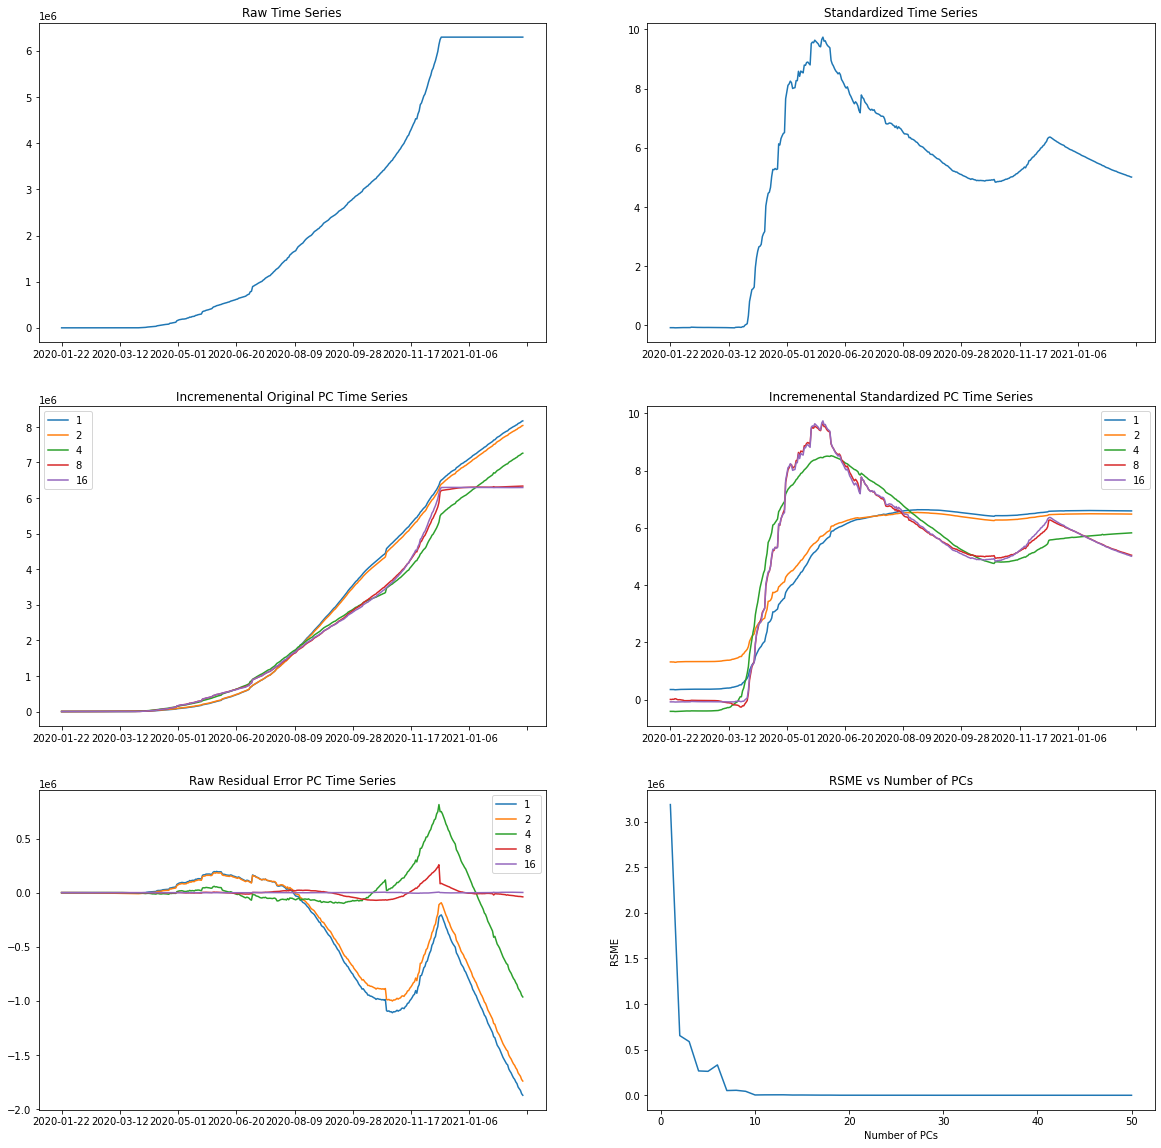

In [1336]:
#Recovered Cases
countrycases('US')

Country:  Canada


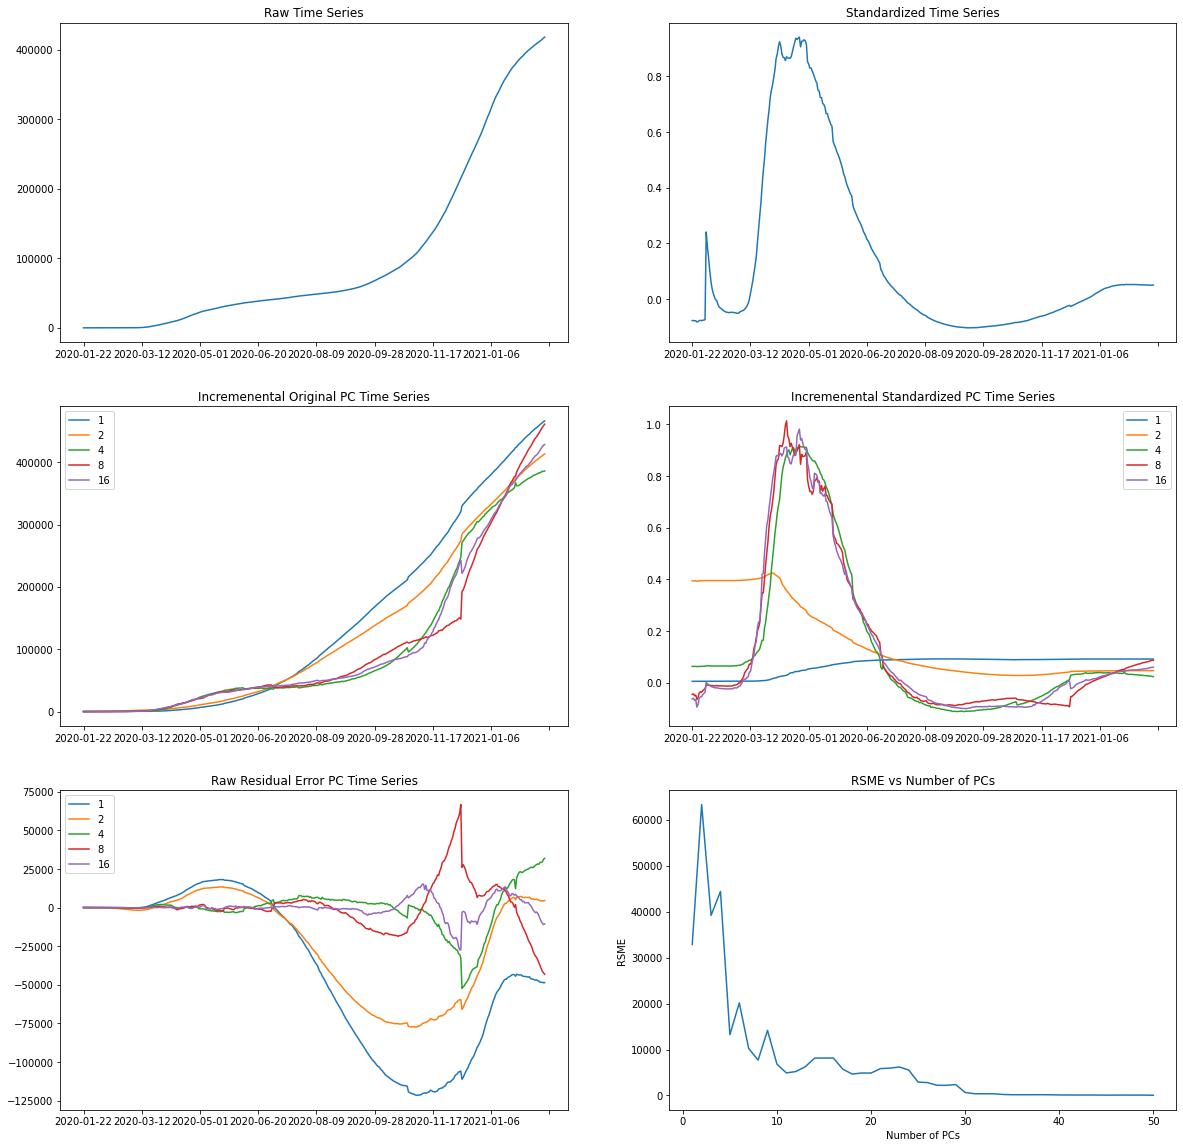

In [1337]:
countrycases('Canada')

Country:  China


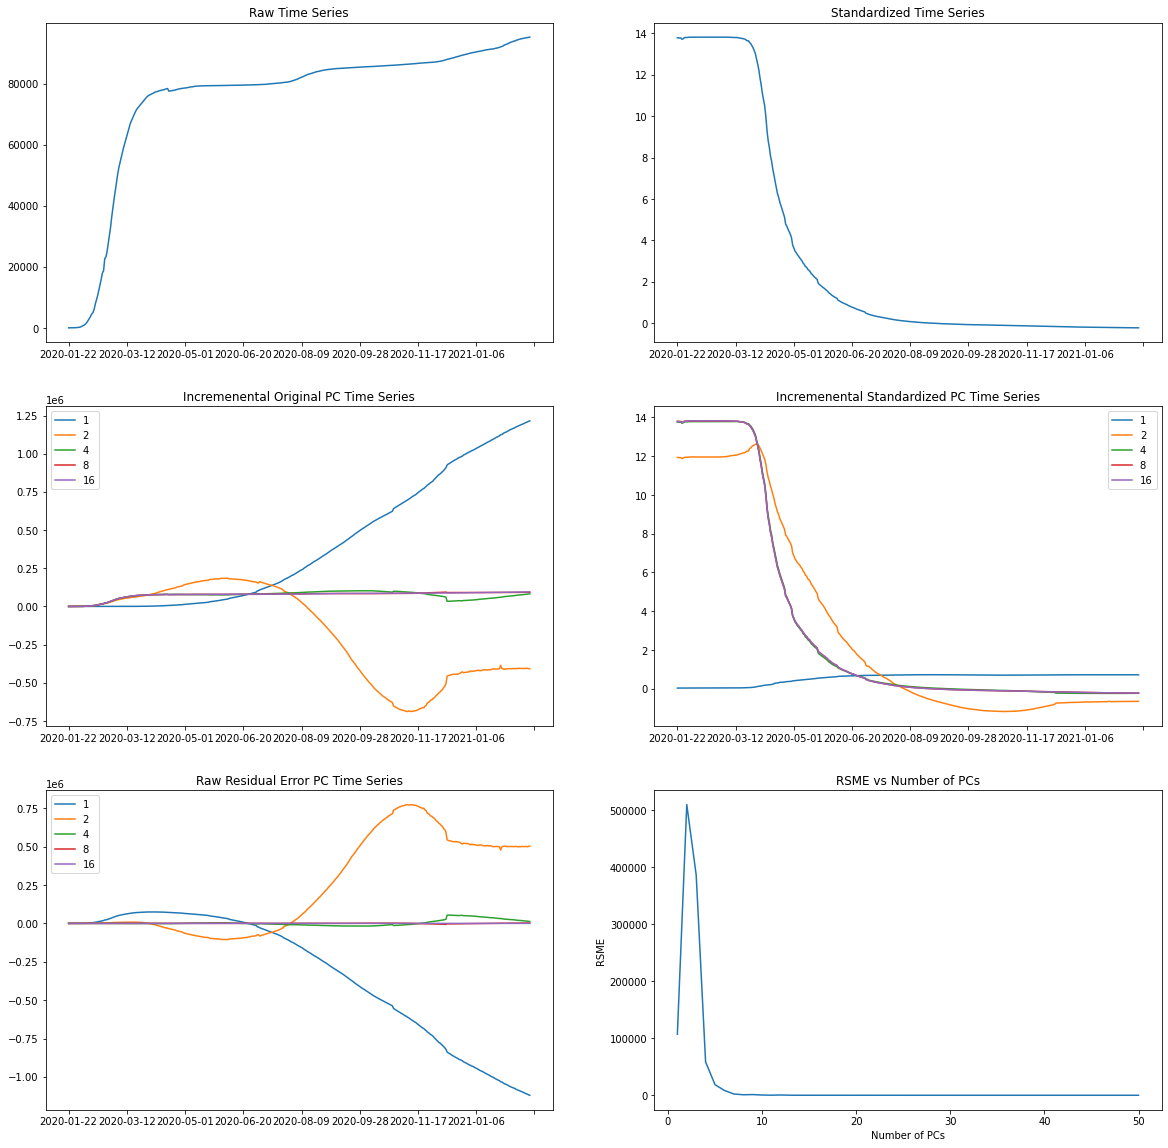

In [1338]:
countrycases('China')

# Part 5: PCA on the dimension of the samples [2 Marks]

Since the number of features (dates) in our dataset is greater than the number of samples (countries), we can apply PCA on the sample dimension for faster computation. 
Repeat part 4, where you apply PCA using this technique. Compare the results and report your findings. 

In [1339]:
### YOUR CODE HERE ###

from sklearn.impute import MissingIndicator

#Preprocessing the missing data with ffill method (Using the previous date as the value)
Trans = [] #Transverse table and look through each row
for i in range(recovered_raw.index.shape[0]):
  Trans.append(np.array(recovered_raw.loc[recovered_raw.index[i]].replace(0,method='ffill')).reshape(1, -1))
Original = np.array(Trans).reshape(n,m)
cases_raw = pd.DataFrame(Original, index = recovered_raw.index, columns=recovered_raw.columns)

#Transforming the data - Cannot use Standard Scaler
cases_std = cases_raw

#Covariance Shape
n, m = cases_std.shape
print(n, m)

#Covariance Matrix using transposed
C = np.dot(cases_std, cases_std.T) / (n-1)
print(C.shape)

# Eigen decomposition - transform the eigenVector
eigenValues, eigenVectors = np.linalg.eigh(C) 
eigenVectors = np.dot(cases_std.T, eigenVectors)
for i in range(n):
  eigenVectors[:, i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])
print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)

#Descending order
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

192 397
(192, 192)
Eig Vec:
  [[ 1.20783447e-04 -1.34354288e-04  5.46223213e-04 ... -1.37919424e-07
   1.17031207e-08  1.28347797e-09]
 [ 1.24197428e-04 -1.37693477e-04  5.46224130e-04 ... -1.47742696e-07
   1.25624152e-08  1.37463076e-09]
 [ 1.70933225e-04 -1.91513867e-04  8.19332067e-04 ... -1.77409320e-07
   1.49767975e-08  1.65175856e-09]
 ...
 [ 4.95155604e-02 -5.16120887e-02 -1.53654990e-01 ... -2.77335906e-02
  -1.21011334e-01  1.03616512e-01]
 [ 5.11850470e-02 -5.04555173e-02  7.45029774e-02 ... -3.19317239e-02
  -1.22340499e-01  1.03980049e-01]
 [-8.16804199e-02  8.31028359e-02 -3.23125748e-03 ... -3.29359778e-02
  -1.23306532e-01  1.04159676e-01]]  
 Eig Val: 
 [-2.45792083e-14  2.27685499e-14  7.89804914e-04  2.56289956e-03
  2.75550475e-03  2.30025244e-02  4.20859438e-02  6.43443953e-02
  1.25553668e-01  1.50423954e-01  2.63935176e-01  8.75588019e-01
  1.08168947e+00  1.68932507e+00  2.83539661e+00  3.22654577e+00
  4.12483154e+00  8.08342785e+00  8.48788374e+00  9.99895189

In [1340]:
#Created a new function since inverse transform doesn't work 

def Inversecountrycases(country_name):
  print("Country: ", country_name)
  country = country_name
  figs, axes = plt.subplots(3, 2, figsize = (20,20))

  #Plots the original and standardized time-series for the specified country
  cases_raw.iloc[list(cases_raw.index).index(country)].plot(ax=axes[0,0], title = 'Raw Time Series')
  cases_std_df.iloc[list(cases_std_df.index).index(country)].plot(ax=axes[0,1], title = 'Standardized Time Series')

  #Incremental reconstruction of standardized time series
  Reconstruction = []
  InvReconstruction = []
  CumResiduals = []
  RSME = []

  PC_counter = [1, 2, 4, 8, 16]
  count = 0
  for i in range(0, 50):
    W = eigenVectors[:, 0:i] #Using number of PCs
    projX = np.dot(cases_std, W) #Projection
    ReconX = np.dot(projX, W.T) #Reconstruct data
    Reconstruction.append(ReconX[list(cases_raw.index).index(country)]) #Add all the cumulative eigenvectors to a list
    Reconstruction_df = pd.DataFrame(Reconstruction[i].reshape(1,m), columns=cases_raw.columns) 

    #Calculating Residual Error with respect to original time series
    residual = cases_raw.values[list(cases_raw.index).index(country)] - Reconstruction[i]
    CumResiduals.append(residual)
    CumResiduals_df = pd.DataFrame(CumResiduals[i].reshape(1,m), columns=cases_raw.columns)

    #Calculating RSME of reconstruction (RSME vs Number of PCs)
    RSME.append(np.sqrt(np.sum(CumResiduals[i]**2)/m))

    #Plotting Specific Graphs
    if count != len(PC_counter): #Can change the list numbers inside PC_counter to see which PCs affect in what way
      if i in PC_counter:
        Reconstruction_df.iloc[0].plot(ax = axes[1,1], title = 'Incremenental Original PC Time Series', label = i, legend = True) #Plotting reconstruction on Original Data
        CumResiduals_df.iloc[0].plot(ax = axes[2,0], title = 'Raw Residual Error PC Time Series', label = i, legend = True) #Plotting residual error on original Data
        count = count + 1
  
  #Plot for all i components(50)
  PC_Count = np.arange(1, 51, 1)
  plt.plot(PC_Count, RSME)
  plt.title("RSME vs Number of PCs")
  plt.xlabel("Number of PCs")
  plt.ylabel("RSME")

Country:  US


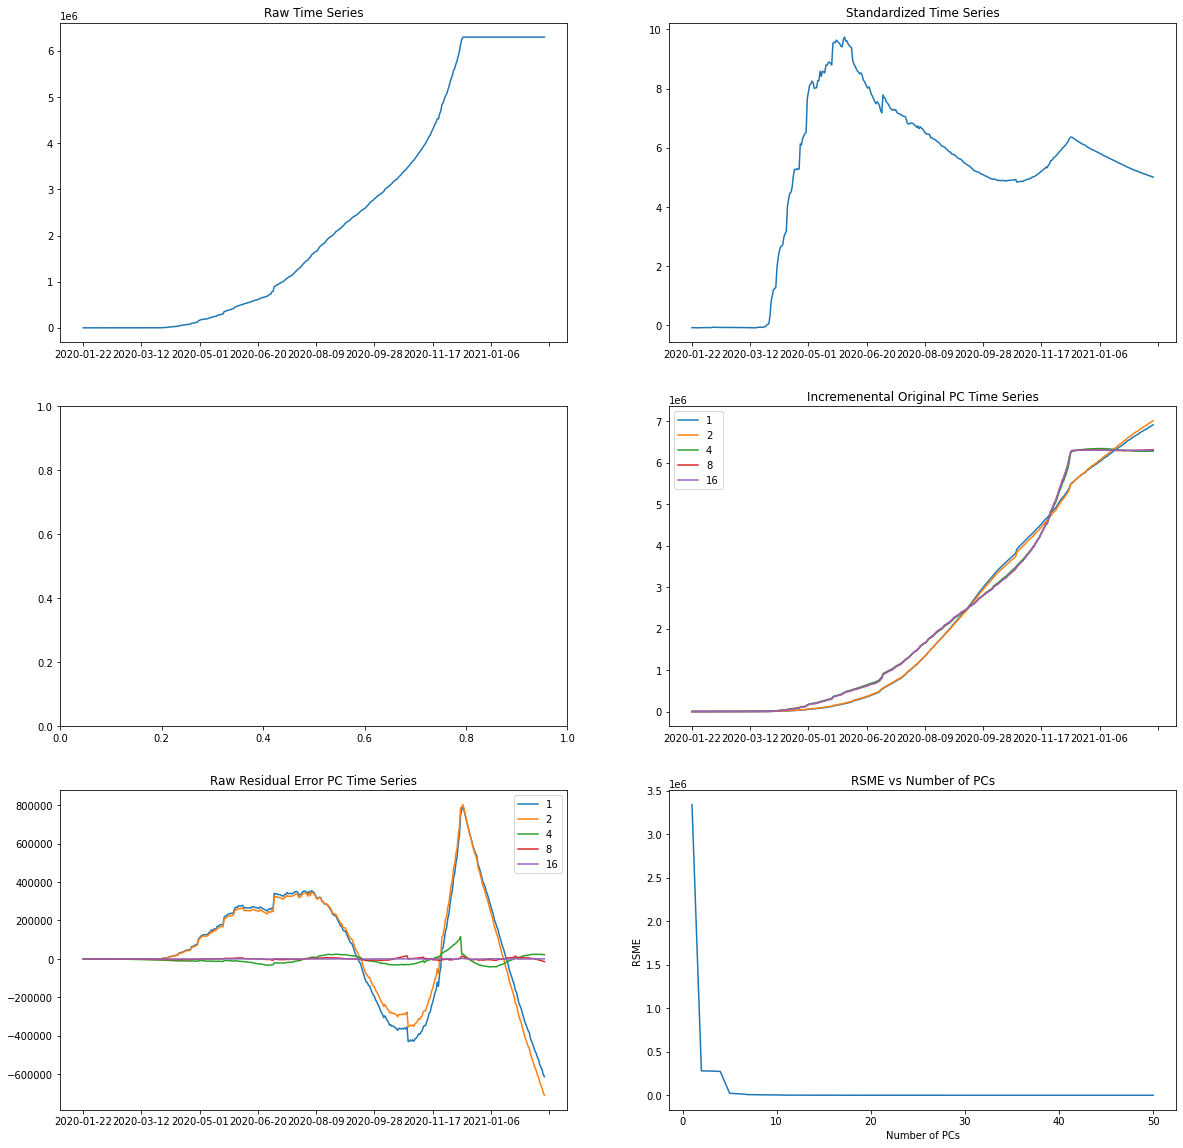

In [1341]:
Inversecountrycases('US')

Country:  Canada


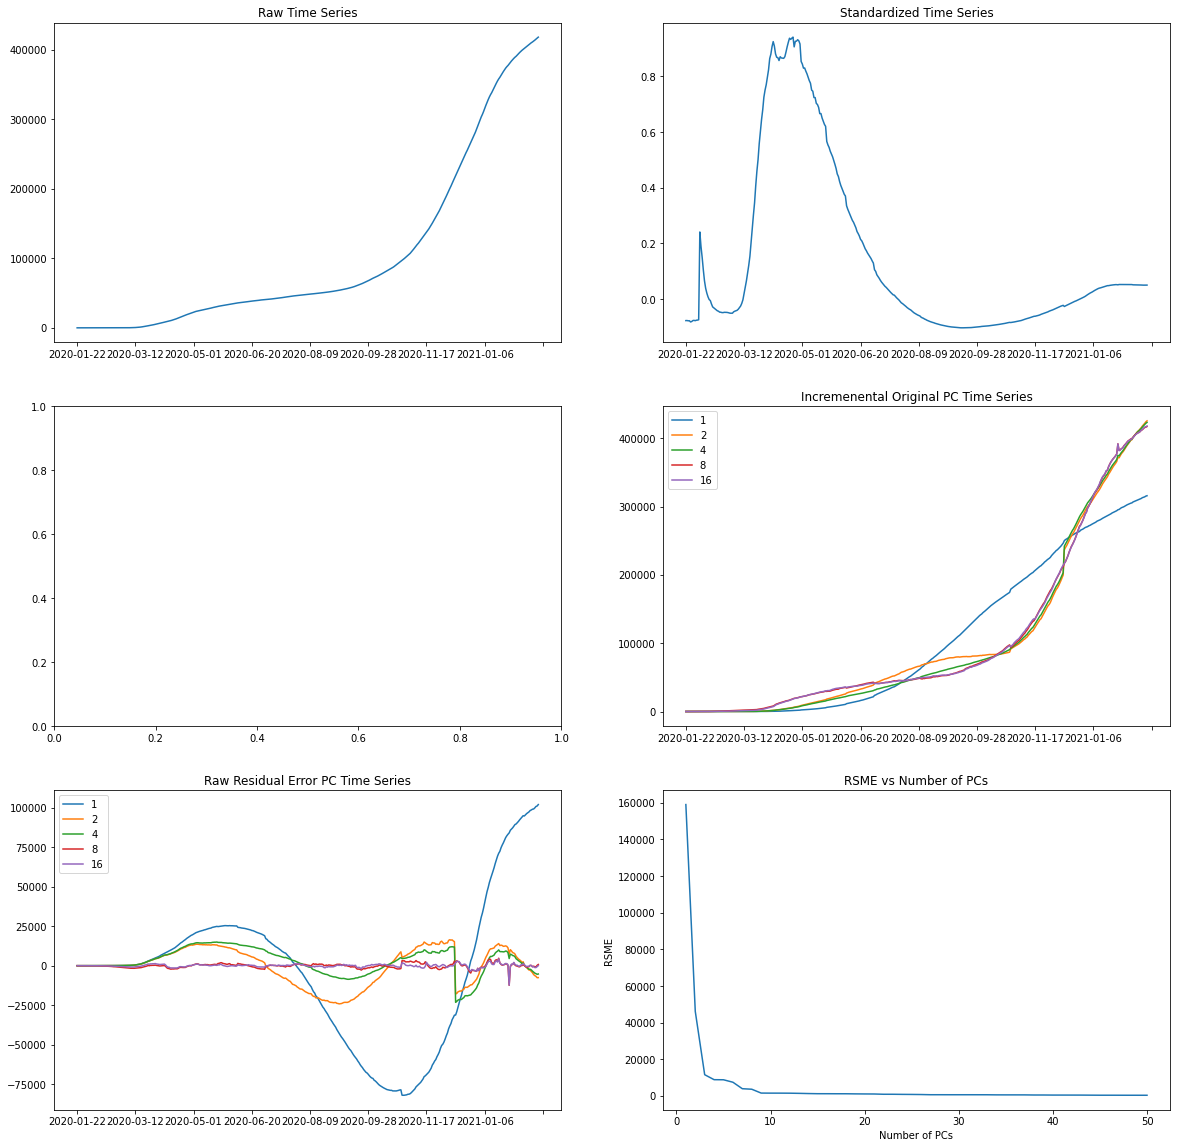

In [1342]:
Inversecountrycases('Canada')

Country:  China


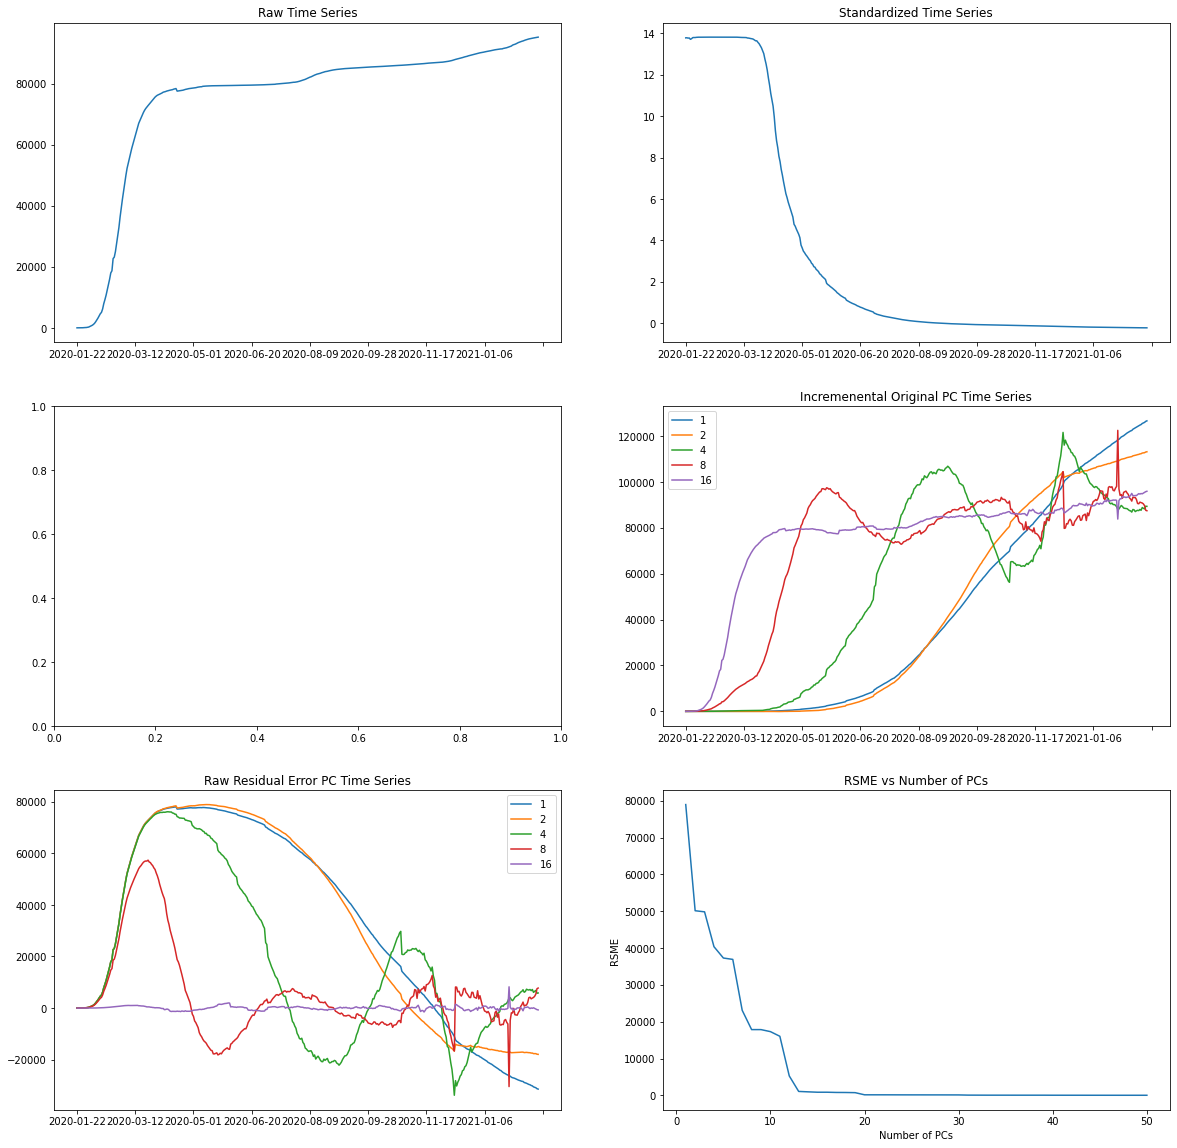

In [1343]:
Inversecountrycases('China')

The difference when using the 2 different methods are noticable for small PCs. It is observable that since we're using less data for the reconstruction, the error and differences between number of PCs are larger and noticable. As PCs increase, it tends to converge a bit and look the same as the PCA for the dates computations. 

# Part 6: MNIST dataset [3 Marks]
MNIST is a dataset for hand-written digit recognition. 
Each image in MNIST has 28x28 pixels which can be represented in an array with 784 elements. In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Compute the covariance of the dataframe and perform eigendecomposition.  **[0.5]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.5]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ th principal components. **[0.5]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits. **[0.5]**
* Assume you want to share this dataset with someone else. Instead of directly giving him the whole dataset, you can share the eigenvectors (some of them) and projections with him, and he can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[1]**
  * Hint: compare the dataset size with a case where we only use principal components and projections and also don't forget to add the mean face (vector).

In [1344]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

In [1345]:
x.shape

(1000, 784)

Label is: 4


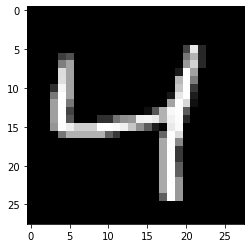

In [1346]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show() 

In [1347]:
### YOUR CODE HERE ###
mu = x.mean(axis=0) #Mean image
x_std = x - mu #Only centering

#Covariance Matrix
n_P6, m_P6 = x_std.shape
C_P6 = np.dot(x_std.T, x_std) / (n_P6-1) 

# Eigen decomposition
eigenValues_P6, eigenVectors_P6 = np.linalg.eigh(C_P6) 
print ("Eig Vec:\n ",eigenVectors_P6, " \n Eig Val: \n", eigenValues)

#Descending order
args_P6 = (-eigenValues_P6).argsort()
eigenValues_P6 = eigenValues_P6[args_P6]
eigenVectors_P6 = eigenVectors_P6[:, args_P6]

Eig Vec:
  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]  
 Eig Val: 
 [ 1.39682181e+14  1.33136940e+12  6.20795634e+11  2.20643657e+11
  4.70367525e+10  1.82555755e+10  5.50751112e+09  1.95715988e+09
  1.53257502e+09  1.39628141e+09  7.87257438e+08  5.71020131e+08
  2.84908015e+08  1.88157529e+08  1.34401839e+08  1.08145919e+08
  1.00984113e+08  7.99612578e+07  7.45769094e+07  4.80342480e+07
  4.17026332e+07  3.78719423e+07  2.99284820e+07  2.46356386e+07
  2.01298564e+07  1.91944798e+07  1.46614848e+07  1.17441244e+07
  1.11587516e+07  1.01116339e+07  9.34669468e+06  7.53765792e+06
  6.72991608e+06  5.79885260e+06  5.26764379e+06  4.33241990e+06
  4.09250894e+06  3.56591956e+06  3.05215289e+06  2.71915835e+06
  2.23588629e+06  2.13257252e+06  1.75731366e+06  1.69273187e+06
  1.53337183e+06  1.30983162e+06  1.23041977e+06  1.15335384e+06
  1.05931257e+06  9.73644751e+05  8.859

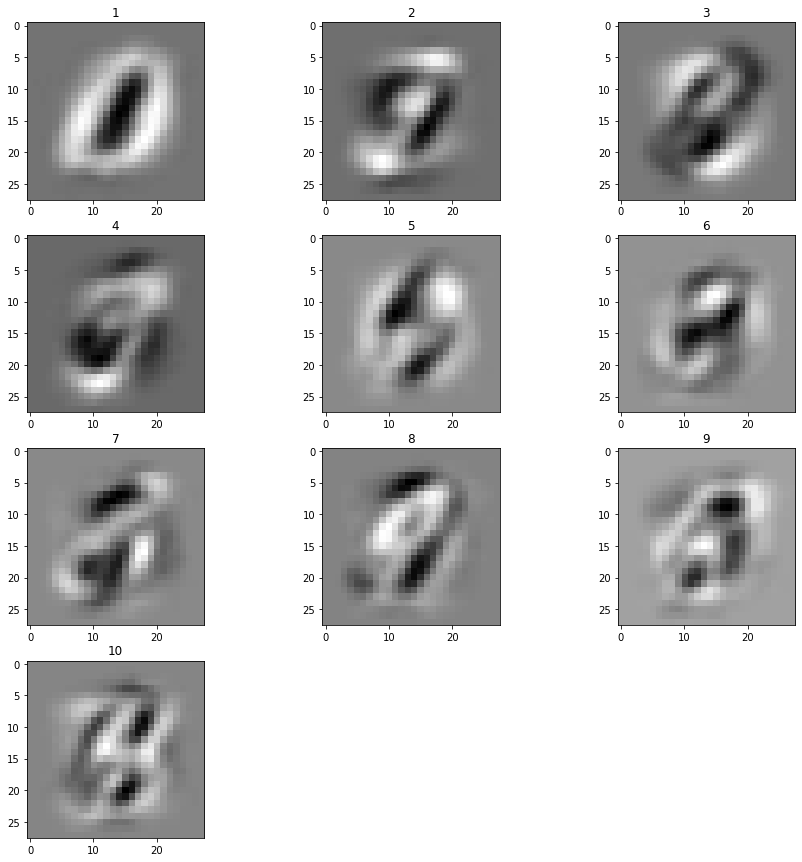

In [1348]:
#Print the first 10 eigenvectors
fig = plt.figure(figsize=(15,15))
for i in range(0, 10):
  plt.subplot(4, 3, i+1)
  plt.imshow(eigenVectors_P6[:, i].reshape(-1, 28), cmap=plt.cm.gray)
  plt.title(i+1)

The trend starts as a 0 digit and then looks more and more random as PCs increases. It seems to focus on the center of the figure as they have more shading (black and white pixels)

In [1349]:
# Argument n that plots random image from dataset and reconstruction with the first n Principal Components
import random 
import math 

def NumberRecon(n): 

  randimage = random.randint(0, 999) #Picks random number from 0 to 999
  print(randimage)

  #Plot random image
  plt.gray()
  plt.imshow(x[randimage].reshape(28,28))
  print("Number is ", y[randimage])

  #Creating reconstruction using n - # of PCs
  reconImage = []
  x_P6 = x[randimage].reshape(1, -1) #Using only that image
  for i in range(1, n+1):
    W_P6 = eigenVectors_P6[:, :i] #Sorted eigenvectors to n'th argument
    projectionP6 = np.dot(x_P6 - mu, W_P6) #Projection
    ReconP6 = np.dot(projectionP6, W_P6.T) + mu #Reconstruction
    reconImage.append(ReconP6.reshape(28,28)) #Large list of all the reconstruction

  #Creating the graph
  rows = math.ceil(sqrt(n)) #Shaping number of graphs
  fig = plt.figure(figsize=(15,15))
  for j in range(0, n):
    plt.subplot(rows, rows, j+1)
    plt.imshow(reconImage[j], cmap=plt.cm.gray)
    plt.title(j+1)

693
Number is  2


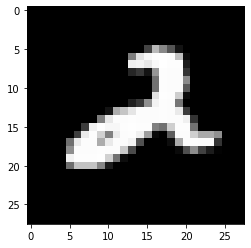

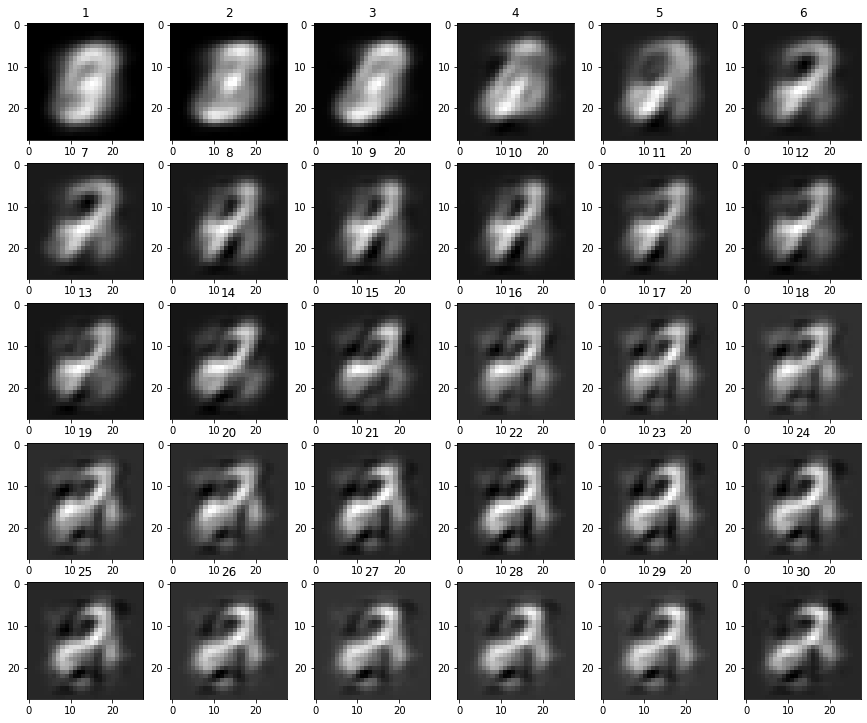

In [1350]:
NumberRecon(30)

482
Number is  9


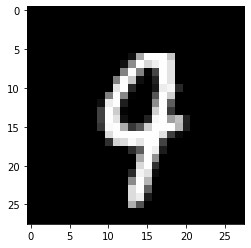

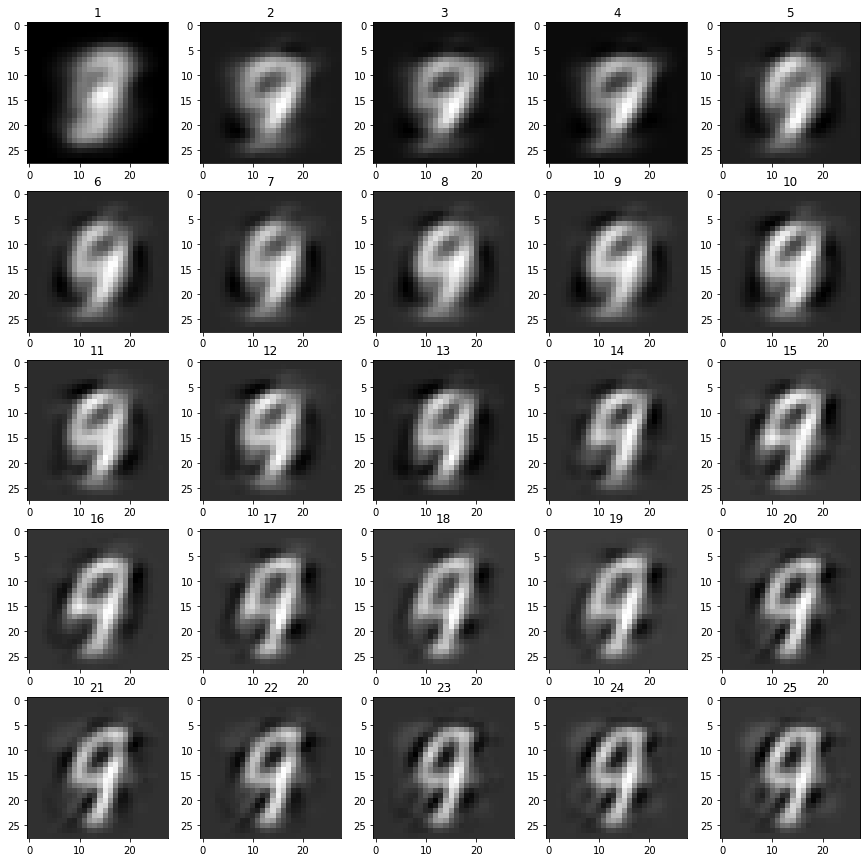

In [1351]:
NumberRecon(25)

905
Number is  1


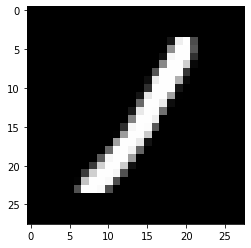

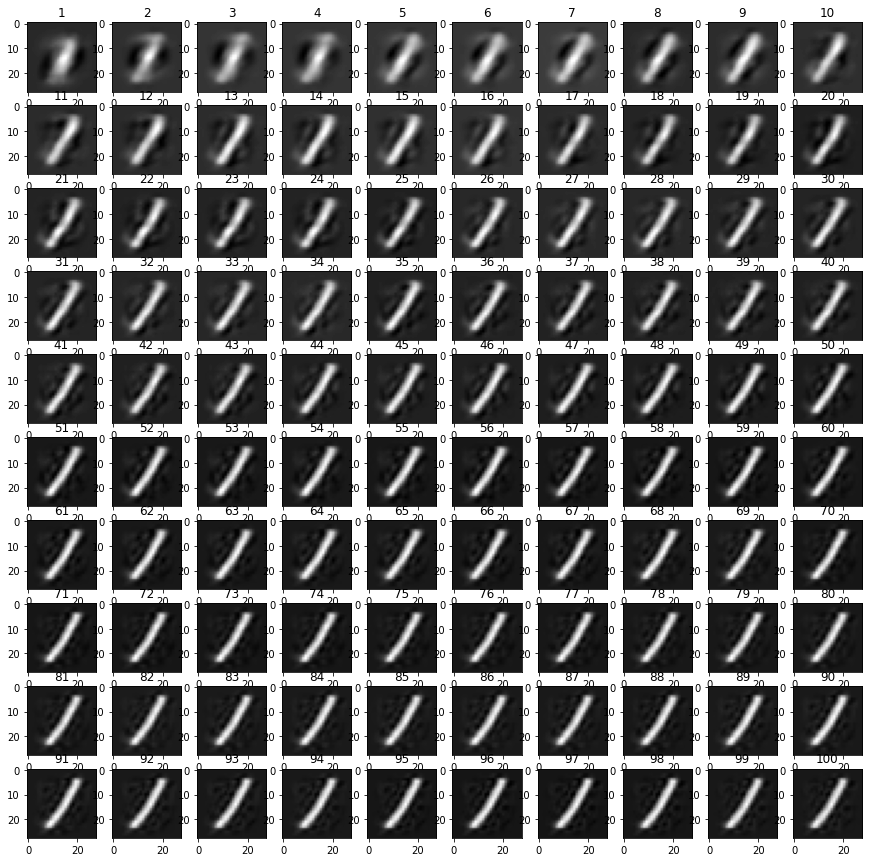

In [1352]:
NumberRecon(100)

It's somewhat hard to not bias when you know the number before looking at when you can clearly see the number. On average, I can distinguish the number around 10 PCs, but to see the number clearly and confidently would be around 20 PCs.

In [1353]:
#Original Dataset Size
ximages, xelements = x.shape
print(xelements, ximages)

#Number of PCs required
PCreq = 20

#Compression ratio for 1000 images
CompressionRatio = xelements*ximages / (xelements*PCreq + ximages*PCreq + mu.shape[0]) #1000 * 784 / 20(784 + 1000 + 784) add the mean face vector used to standardize
print("Compression ratio is: ", CompressionRatio)

784 1000
Compression ratio is:  21.500658183413776


# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


